In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
plt.style.use('seaborn')
sns.set_palette("husl")

C:\Users\kunal\AppData\Local\Temp\ipykernel_14120\4078911919.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [5]:
def load_data():
    custom_df = pd.read_csv('Customers.csv')
    prod_df = pd.read_csv('Products.csv')
    trans_df = pd.read_csv('Transactions.csv')
    return custom_df, prod_df, trans_df

In [6]:
#Preprocessing
def preprocessing(custom_df, prod_df, trans_df):
    
    custom_df['SignupDate'] = pd.to_datetime(custom_df['SignupDate'])
    trans_df['TransactionDate'] = pd.to_datetime(trans_df['TransactionDate'])
    
    print("Missing value Summary:")
    print("customer df:")
    print(custom_df.isnull().sum())
    print("product df:")
    print(prod_df.isnull().sum())
    print("transactions df:")
    print(trans_df.isnull().sum())
    
    return custom_df, prod_df, trans_df

In [7]:
def basic_analysis(custom_df, prod_df, trans_df):
    
    print("customer stats:")
    print(custom_df.describe())
    print("product stats:")
    print(prod_df.describe())
    print("transaction stats:")
    print(trans_df.describe())
    
    # customer dist by region
    plt.figure(figsize=(10, 6))
    custom_df['Region'].value_counts().plot(kind='bar')
    plt.title('customer dist by region')
    plt.xlabel('Region')
    plt.ylabel('No. of Customers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [8]:
def time_analysis(custom_df, trans_df):
    
    plt.figure(figsize=(12, 6))
    custom_df['SignupDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line')
    plt.title('signup trend over time')
    plt.xlabel('Month')
    plt.ylabel('No. of signups')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    trans_df['TransactionDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line')
    plt.title('transaction trends')
    plt.xlabel('Month')
    plt.ylabel('No. of transactions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [9]:
def product_analysis(prod_df, trans_df):
    
    # prod category dist
    plt.figure(figsize=(10, 6))
    prod_df['Category'].value_counts().plot(kind='bar')
    plt.title('product distribution by category')
    plt.xlabel('Category')
    plt.ylabel('No. of Products')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # price dist
    plt.figure(figsize=(10, 6))
    sns.histplot(data=prod_df, x='Price', bins=30)
    plt.title('product price distribution')
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [10]:
# By category
def transaction_analysis(trans_df, prod_df):
    
    merged_df = trans_df.merge(prod_df, on='ProductID')
    
    # sales
    category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    category_sales.plot(kind='bar')
    plt.title('Sales by Product Category')
    plt.xlabel('Category')
    plt.ylabel('Total Sales Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # avg transaction value 
    avg_transaction = merged_df.groupby('Category')['TotalValue'].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    avg_transaction.plot(kind='bar')
    plt.title('avg transaction value by category')
    plt.xlabel('Category')
    plt.ylabel('avg Transaction Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [11]:
# By region
def customer_behavior_analysis(trans_df, custom_df):
    
    merged_df = trans_df.merge(custom_df, on='CustomerID')
    
    # customer purchase freq
    customer_frequency = merged_df['CustomerID'].value_counts()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data=customer_frequency, bins=30)
    plt.title('customer purchase Freq Distribution')
    plt.xlabel('No. of Purchases')
    plt.ylabel('No. of Customers')
    plt.tight_layout()
    plt.show()
    
    # Average purchase value
    region_avg_purchase = merged_df.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    region_avg_purchase.plot(kind='bar')
    plt.title('avg purchase value')
    plt.xlabel('region')
    plt.ylabel('avg purchase value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [12]:
def main():
    print("Loading data...")
    custom_df, prod_df, trans_df = load_data()
    
    print("Preprocessing data...")
    custom_df, prod_df, trans_df = preprocessing(custom_df, prod_df, trans_df)
    
    print("Performing basic analysis...")
    basic_analysis(custom_df, prod_df, trans_df)
    
    print("Analyzing patterns...")
    time_analysis(custom_df, trans_df)
    
    print("Analyzing product patterns...")
    product_analysis(prod_df, trans_df)
    
    print("Analyzing transaction patterns...")
    transaction_analysis(trans_df, prod_df)
    
    print("Analyzing customer behavior...")
    customer_behavior_analysis(trans_df, custom_df)

Loading data...
Preprocessing data...

Missing Values Summary:

Customers DataFrame:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products DataFrame:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions DataFrame:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Performing basic analysis...

Customer Statistics:
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00

Product Statistics:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Transaction Statistics:
                     TransactionDate     Quantity   TotalValue     

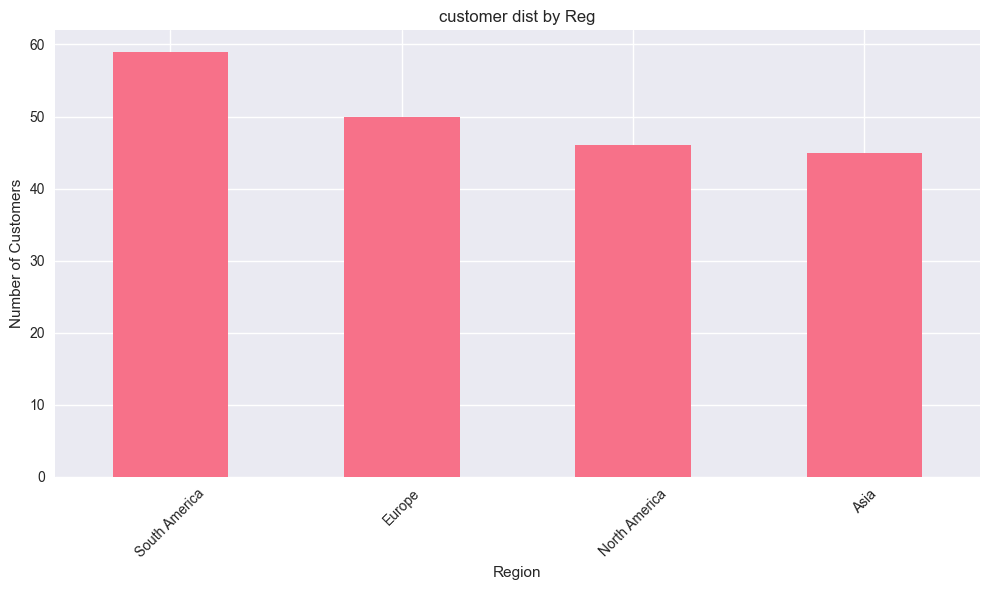


Analyzing temporal patterns...


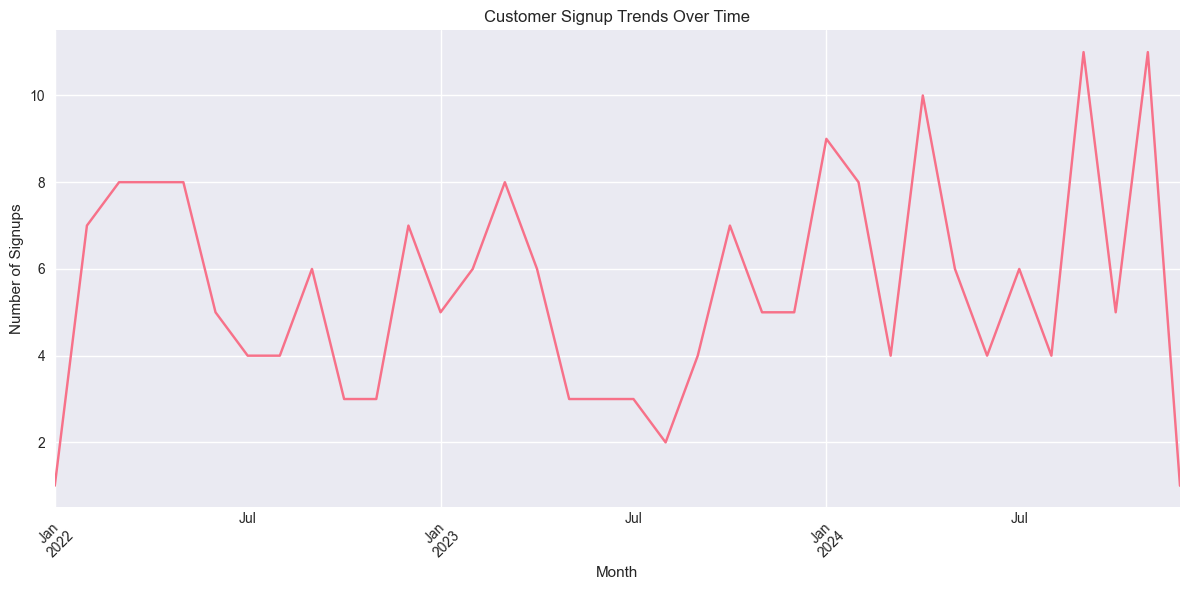

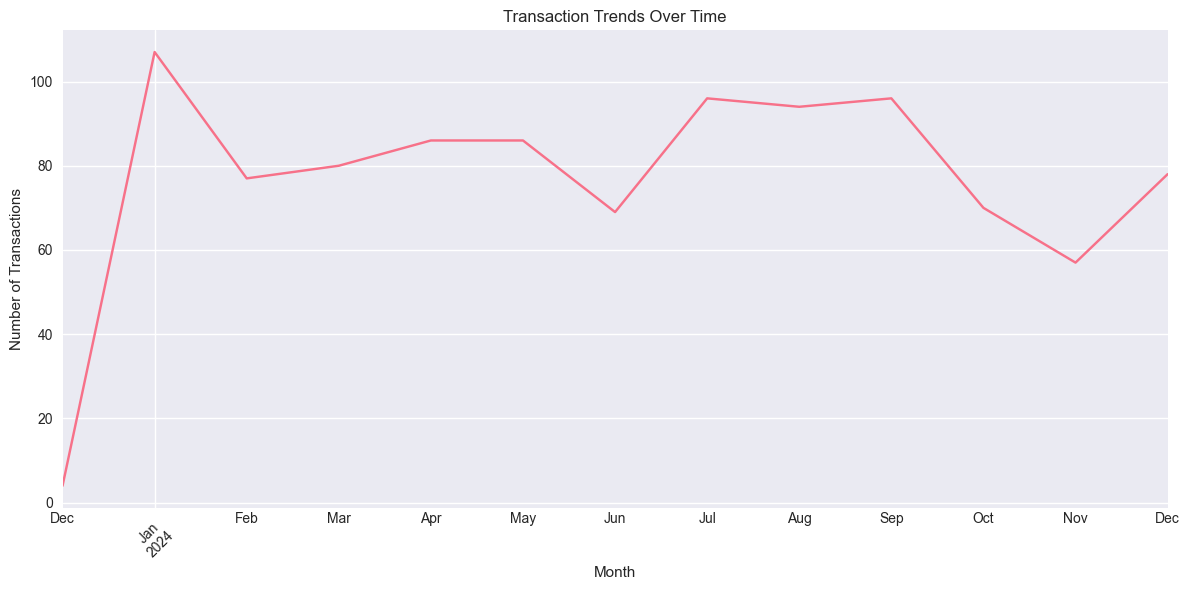


Analyzing product patterns...


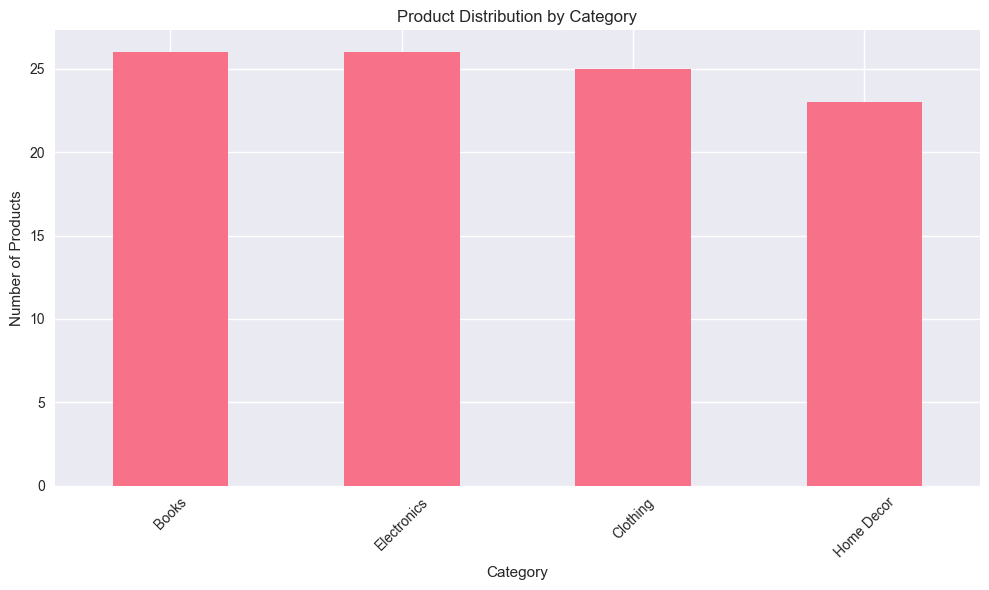

c:\Users\kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


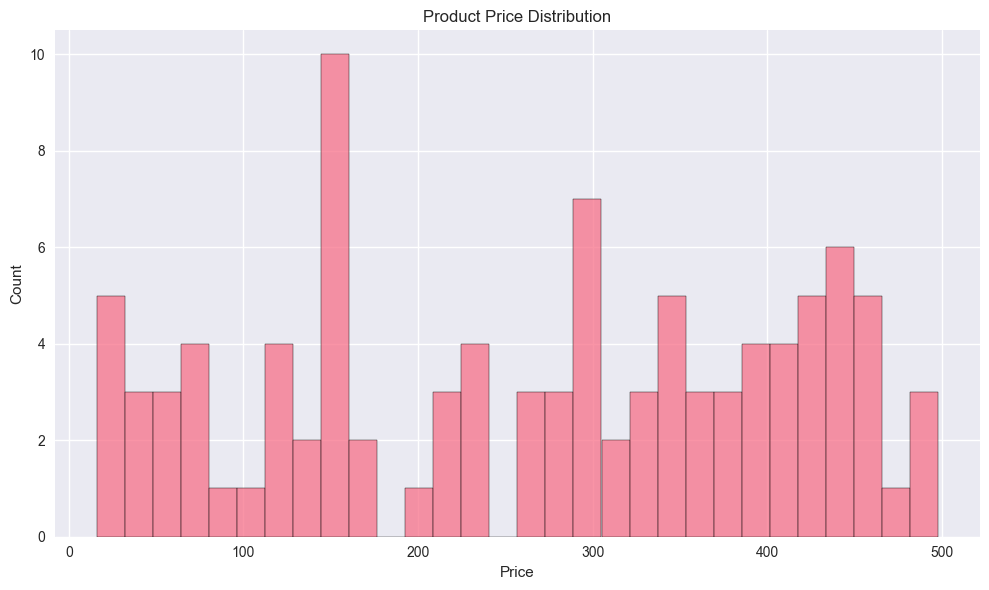


Analyzing transaction patterns...


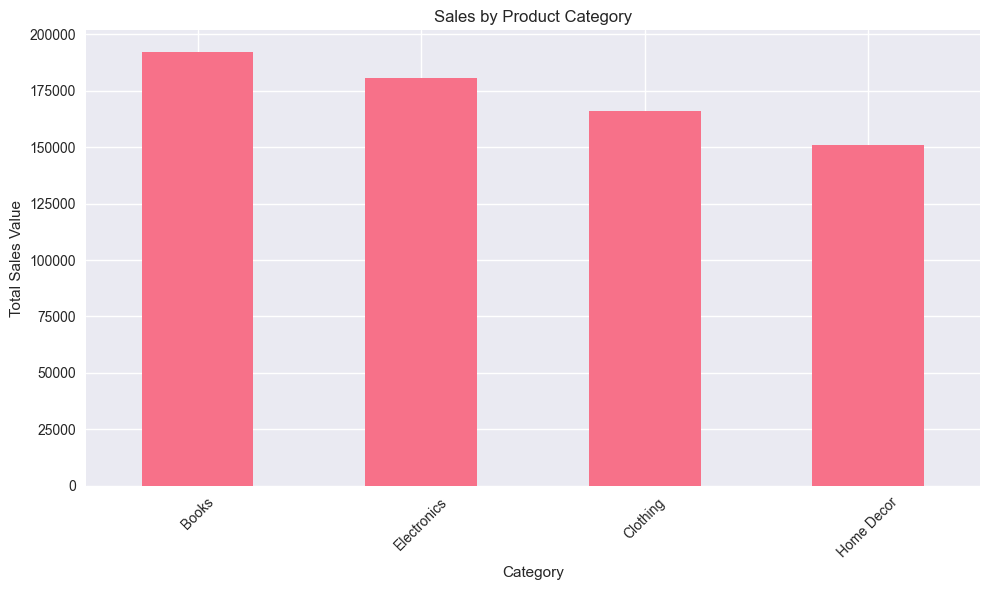

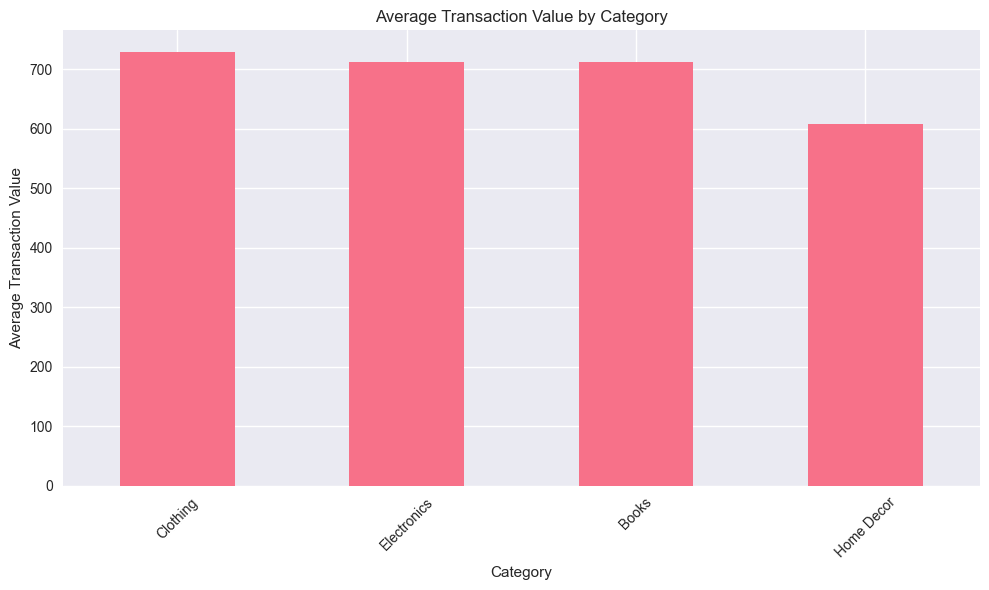


Analyzing customer behavior...


c:\Users\kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


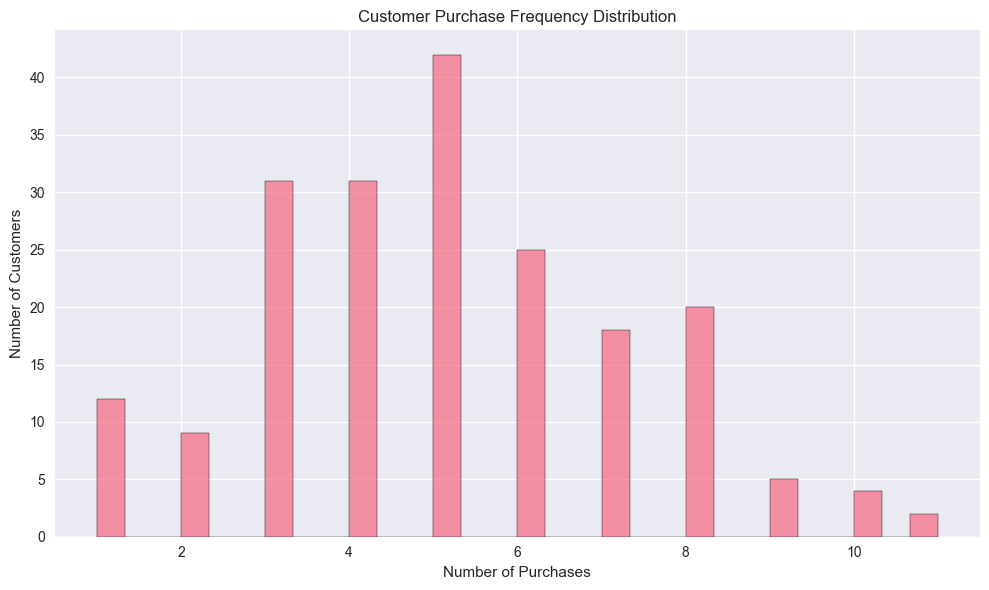

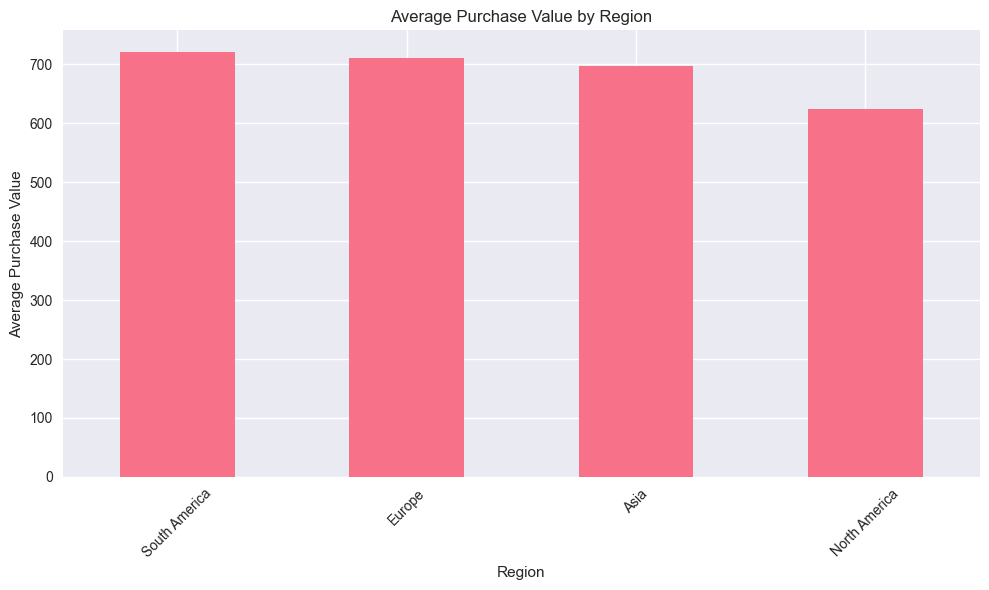

In [13]:
if __name__ == "__main__":
    main()